# A-B Testing Ecommerce store

#### The ecommerce has changed the placement of the secondary pictures from undet the main to the left of the main piture.

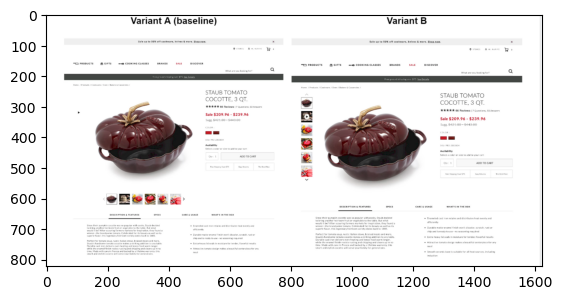

In [1]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("a_b_test.png")
plt.imshow(image)
plt.show()

### Lets look at the data.

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats


df = pd.read_csv("assessment_da25.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


### Frst i want to make chore that the version A and B is has the same number of customers

In [4]:
group_df = df.groupby("Variant").count()
group_df

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
Variant,,,,,,
A,1000,1000,1000,1000,1000,1000
B,1000,1000,1000,1000,1000,1000


### Looks good, now i whant to se the sum and mean for all our colums 

In [5]:
sum_df = df.groupby("Variant").sum()
sum_df

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
Variant,,,,,,
A,4985,7689.99,1884,1495,20543,499500
B,5317,9289.53,2469,1324,20047,1499500


In [6]:
mean_df = df.groupby("Variant").mean()
mean_df

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
Variant,,,,,,
A,4.985,7.68999,1.884,1.495,20.543,499.5
B,5.317,9.28953,2.469,1.324,20.047,1499.5


### The primary metric i'm gong to look at in this ab thest is number of items add to cart

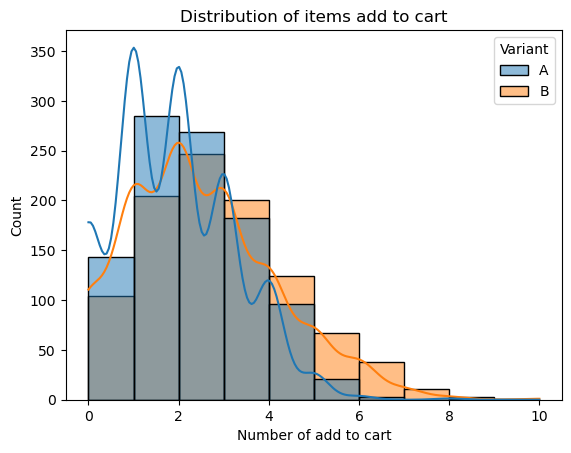

None
Avg items add to cart: Variant
A    1.884
B    2.469
Name: Number of add to cart, dtype: float64


In [7]:
cart_mean = df.groupby("Variant")["Number of add to cart"].mean()

sns.histplot(data=df, x="Number of add to cart", bins=10, hue="Variant", kde=True)
plt.title("Distribution of items add to cart")
print(plt.show())

print(f"Avg items add to cart: {cart_mean}")

### The secondery metric i'm gong to look at in this ab thest is GMV 

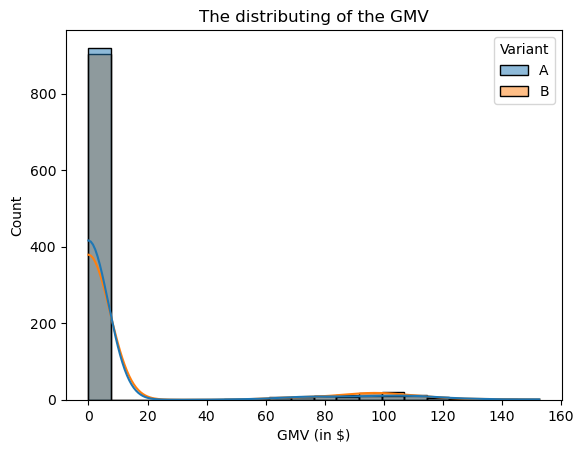

Avg GMV per customers: Variant
A    7.68999
B    9.28953
Name: GMV (in $), dtype: float64


In [15]:
gmv_mean = df.groupby("Variant")["GMV (in $)"].mean()

sns.histplot(data= df, x="GMV (in $)", bins=20, hue="Variant", kde=True)

plt.title("The distributing of the GMV")
plt.show()

print(f"Avg GMV per customers: {gmv_mean}")

### Les't verify if the changes on the primary metric made a statistical significant change.

In [18]:
t_statistic, p_value = stats.ttest_ind(df[df["Variant"] == "A"]["Number of add to cart"], 
                                       df[df["Variant"] == "B"]["Number of add to cart"], equal_var=False)

print("t-statistic:", t_statistic)
print(f"p-value: {p_value}. It is statistical significant beacause the p-value is under 5 %")

t-statistic: -8.777389396187948
p-value: 3.668898697938531e-18. It is statistical significant beacause the p-value is under 5 %


### Les't verify if the changes on the secondery metric made a statistical significant change.

In [19]:
t_statistic, p_value = stats.ttest_ind(df[df["Variant"] == "A"]["GMV (in $)"], 
                                       df[df["Variant"] == "B"]["GMV (in $)"], equal_var=False)

print("t-statistic:", t_statistic)
print(f"p-value: {p_value}. It is NOT statistical significant beacause the p-value is NOT under 5 %")

t-statistic: -1.2839539769831623
p-value: 0.19930776178517312. It is NOT statistical significant beacause the p-value is NOT under 5 %


### Creating a new metric - dropouts, between add to cart and finishing the purchase

In [11]:
# Take out all rows that has GMV over 0 and the Add to cart that is 0 from the Dataframe
df_zero_sales = df[(df["GMV (in $)"] == 0) & (df["Number of add to cart"] != 0)]

dropout = df_zero_sales.groupby("Variant")["Number of add to cart"].count()

print(f"The number of customers that add to cart but didn't buy: {dropout}")

df_zero_sales

The number of customers that add to cart but didn't buy: Variant
A    777
B    799
Name: Number of add to cart, dtype: int64


,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
4,A,5,0.0,3,3,46,4
5,A,3,0.0,1,1,31,5
6,A,5,0.0,2,1,18,6
...,...,...,...,...,...,...,...
1994,B,8,0.0,3,4,20,1994
1995,B,3,0.0,1,0,1,1995
1996,B,3,0.0,1,2,31,1996
1997,B,3,0.0,2,0,3,1997
